In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)



In [2]:
# Load churn data
df = pd.read_csv('churn_data.csv')
df.head()


CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [3]:
df.shape

(440833, 12)

In [4]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [7]:
df.shape

(440832, 12)

In [8]:
df.duplicated().sum()


0

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [10]:
cols = ["Gender", "Subscription Type","Contract Length"]
encoder = LabelEncoder()
for col in cols:
    df[col] = encoder.fit_transform(df[col])

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  int32  
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  int32  
 8   Contract Length    440832 non-null  int32  
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 38.7 MB


In [12]:
df.drop('CustomerID' ,axis =1, inplace=True)


In [13]:
df.shape


(440832, 11)

In [14]:
df.corr()


Age    Gender    Tenure  Usage Frequency  \
Age                1.000000 -0.031419 -0.011630        -0.007190   
Gender            -0.031419  1.000000  0.007978         0.007978   
Tenure            -0.011630  0.007978  1.000000        -0.026800   
Usage Frequency   -0.007190  0.007978 -0.026800         1.000000   
Support Calls      0.158451 -0.091212 -0.027640        -0.022013   
Payment Delay      0.061738 -0.048449 -0.016588        -0.014470   
Subscription Type -0.003816 -0.001018 -0.022416        -0.000197   
Contract Length   -0.000334 -0.002120 -0.000702         0.000321   
Total Spend       -0.084684  0.066138  0.019006         0.018631   
Last Interaction   0.028980  0.134786 -0.006903        -0.004662   
Churn              0.218394 -0.175395 -0.051919        -0.046101   

                   Support Calls  Payment Delay  Subscription Type  \
Age                     0.158451       0.061738          -0.003816   
Gender                 -0.091212      -0.048449          -0.001018   
Tenure                 -0.027640      -0.016588          -0.022416   
Usage Frequency        -0.022013      -0.014470          -0.000197   
Support Calls           1.000000       0.162889          -0.008789   
Payment Delay           0.162889       1.000000          -0.003393   
Subscription Type      -0.008789      -0.003393           1.000000   
Contract Length         0.000458      -0.000127           0.002664   
Total Spend            -0.221594      -0.121044           0.007488   
Last Interaction        0.077684       0.042708          -0.000453   
Churn                   0.574267       0.312129          -0.017181   

                   Contract Length  Total Spend  Last Interaction     Churn  
Age                      -0.000334    -0.084684          0.028980  0.218394  
Gender                   -0.002120     0.066138          0.134786 -0.175395  
Tenure                   -0.000702     0.019006         -0.006903 -0.051919  
Usage Frequency           0.000321     0.018631         -0.004662 -0.046101  
Support Calls             0.000458    -0.221594          0.077684  0.574267  
Payment Delay            -0.000127    -0.121044          0.042708  0.312129  
Subscription Type         0.002664     0.007488         -0.000453 -0.017181  
Contract Length           1.000000    -0.000642         -0.000035 -0.000093  
Total Spend              -0.000642     1.000000         -0.056890 -0.429355  
Last Interaction         -0.000035    -0.056890          1.000000  0.149616  
Churn                    -0.000093    -0.429355          0.149616  1.000000

In [15]:
df.describe()


Age         Gender         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean       39.373153       0.567681      31.256336        15.807494   
std        12.442369       0.495399      17.255727         8.586242   
min        18.000000       0.000000       1.000000         1.000000   
25%        29.000000       0.000000      16.000000         9.000000   
50%        39.000000       1.000000      32.000000        16.000000   
75%        48.000000       1.000000      46.000000        23.000000   
max        65.000000       1.000000      60.000000        30.000000   

       Support Calls  Payment Delay  Subscription Type  Contract Length  \
count  440832.000000  440832.000000      440832.000000    440832.000000   
mean        3.604437      12.965722           1.013842         0.998485   
std         3.070218       8.258063           0.813968         0.895773   
min         0.000000       0.000000           0.000000         0.000000   
25%         1.000000       6.000000           0.000000         0.000000   
50%         3.000000      12.000000           1.000000         1.000000   
75%         6.000000      19.000000           2.000000         2.000000   
max        10.000000      30.000000           2.000000         2.000000   

         Total Spend  Last Interaction          Churn  
count  440832.000000     440832.000000  440832.000000  
mean      631.616223         14.480868       0.567107  
std       240.803001          8.596208       0.495477  
min       100.000000          1.000000       0.000000  
25%       480.000000          7.000000       0.000000  
50%       661.000000         14.000000       1.000000  
75%       830.000000         22.000000       1.000000  
max      1000.000000         30.000000       1.000000

In [16]:
df.columns


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

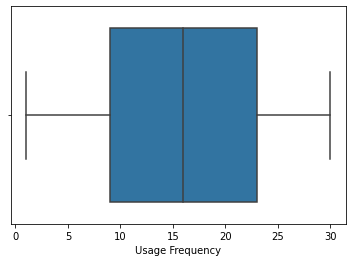

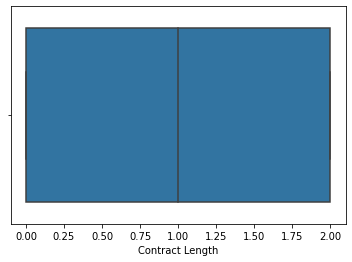

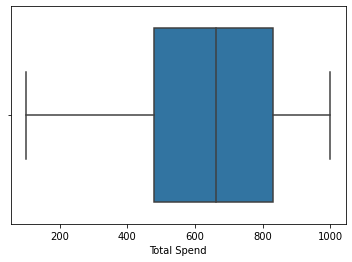

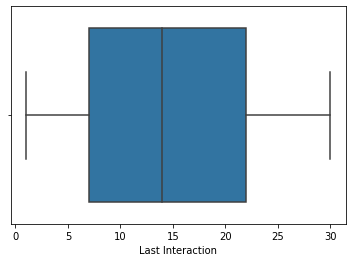

In [17]:
cols = [col for col in df.columns if col!='Churn']
for col in cols :
    sns.boxplot(x=df[col])
    plt.show()

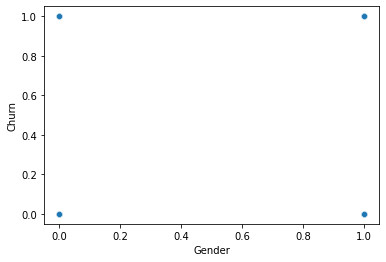

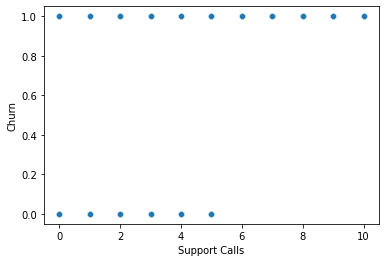

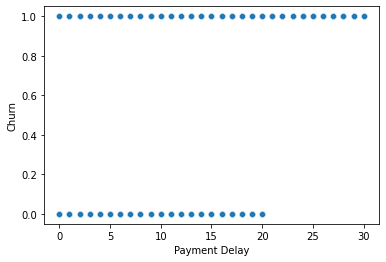

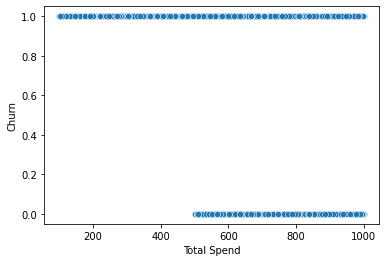

In [18]:
for col in cols :
    sns.scatterplot(x=df[col], y=df['Churn'])
    plt.show()


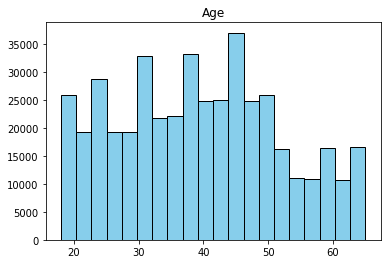

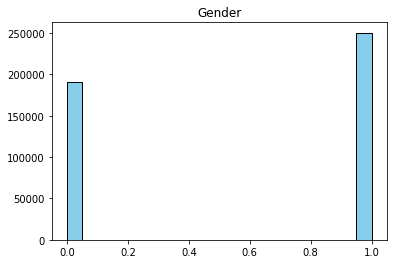

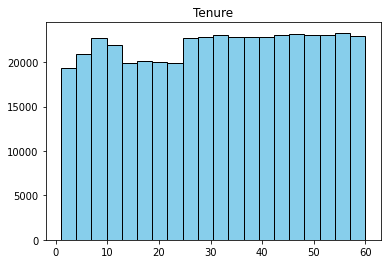

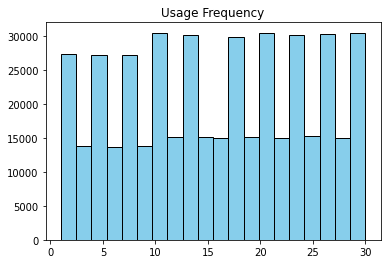

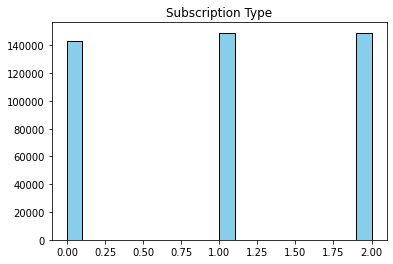

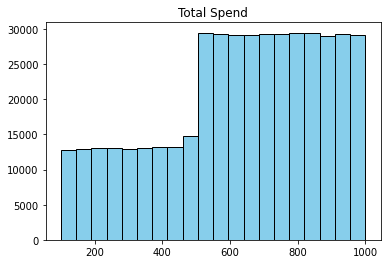

In [19]:
for col in cols :
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.show()

In [20]:
x = df.drop('Churn', axis=1)
y= df["Churn"]

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state=42)


In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(x_test)


In [24]:
accuracy_score(y_pred , y_test)


0.8504769358149875

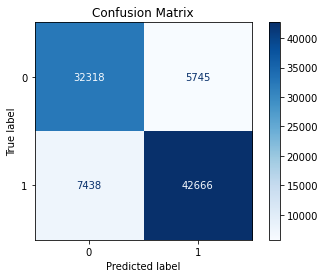

In [25]:
# Step 4: Predict and evaluate
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38063
         1.0       0.88      0.85      0.87     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



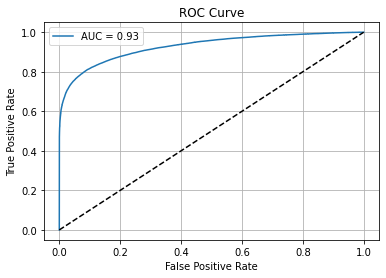

In [27]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
